In [5]:

#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.cm as cm
import datetime
import matplotlib.ticker as ticker

In [18]:
movie_plot = pd.read_csv("data/movies_final.csv")


In [ ]:
movies_df = pd.read_csv(movie_plot)
movies_dataprep = movie_plot[['genres', 'ROI', 'release_date']]
topGenresByROI = movies_dataprep.groupby(['release_date','genres', ])["ROI"].mean()
topGenresByROI=topGenresByROI.to_frame()
topGenresByROI.reset_index()
topGenresByROI
topGenresByROI = topGenresByROI.sort_values('ROI',ascending = False).head(6)
                                                                       
topGenresByROI.reset_index()
topGenresByROI



In [4]:
arrays = [[2007, 2007, 1999, 2015, 2015, 2015],['Horror', 'Mystery', 'Horror', 'Action', 'Thriller','History']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['release_date', 'genres'])  
df = pd.DataFrame({'ROI': [1.288939e+06, 6.444728e+05, 4.132333e+05, 2.215690e+05, 2.215690e+05,2.215690e+05]}, index=index)

df = df.unstack().fillna(0).stack()
                           


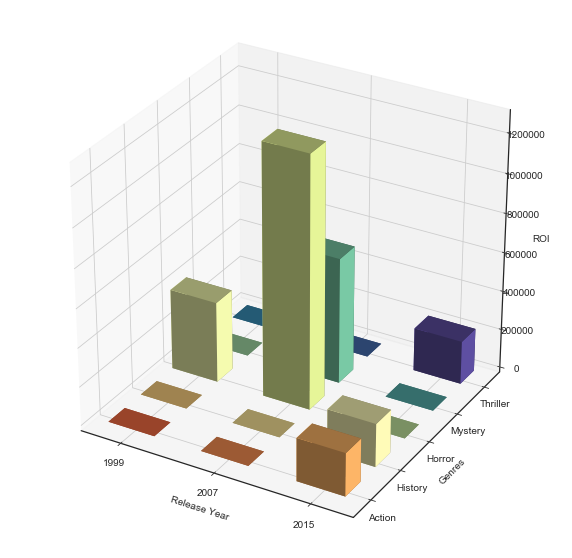

<Figure size 432x288 with 0 Axes>

In [7]:
# Set plotting style
plt.style.use('seaborn-white')

L = []
for i, group in df.groupby(level=1)['ROI']:
    L.append(group.values)
z = np.hstack(L).ravel()

xlabels = df.index.get_level_values('release_date').unique()
ylabels = df.index.get_level_values('genres').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])


x_M, y_M = np.meshgrid(x, y, copy=False)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)

# Labeling the 3 dimensions
ax.set_xlabel('Release Year')
ax.set_ylabel('Genres')
ax.set_zlabel('ROI')

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.Spectral(values)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors)
plt.show()

plt.savefig('3D.png')